In [1]:
import numpy as np
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite
import dwave.inspector
import dimod
import importlib
from collections import defaultdict
import matplotlib.pyplot as plt

In [2]:
# alternative configuration with real data

means = np.load('around_domain_30_means.npy')
intra_corr = np.load('around_domain_30_intra_corr.npy')
inter_corr = np.load('around_domain_30_inter_corr.npy')
        
# marks and number of marks
marks = (3, 5, 6, 7, 8)
M = len(marks)

# number of nucleosomes
N = 10

# max correlation length
L = 5

# independent propensity
h = defaultdict(int)
for n in range(N):
    for i, m in enumerate(marks):
        x = n * M + i
        h[x] = means[m]

# intra-nucleosome correlation
J = defaultdict(int)
for n in range(N):
    for i, m in enumerate(marks):
        for j in range(i+1, M):
            x = n * M + i
            y = n * M + j
            J[(x, y)] = intra_corr[m, j] 
            
# inter-nucleosome correlation
for n in range(N):
    for i, m in enumerate(marks):
        for l in range(1, L+1):
            x = n * M + i
            y = ((n+l)%N) * M + j
            J[(x, y)] = inter_corr[m, l-1] 

print(h)
print(J)

defaultdict(<class 'int'>, {0: 0.47126436781609193, 1: 0.3563218390804598, 2: 0.41379310344827586, 3: 0.3333333333333333, 4: 0.40229885057471265, 5: 0.47126436781609193, 6: 0.3563218390804598, 7: 0.41379310344827586, 8: 0.3333333333333333, 9: 0.40229885057471265, 10: 0.47126436781609193, 11: 0.3563218390804598, 12: 0.41379310344827586, 13: 0.3333333333333333, 14: 0.40229885057471265, 15: 0.47126436781609193, 16: 0.3563218390804598, 17: 0.41379310344827586, 18: 0.3333333333333333, 19: 0.40229885057471265, 20: 0.47126436781609193, 21: 0.3563218390804598, 22: 0.41379310344827586, 23: 0.3333333333333333, 24: 0.40229885057471265, 25: 0.47126436781609193, 26: 0.3563218390804598, 27: 0.41379310344827586, 28: 0.3333333333333333, 29: 0.40229885057471265, 30: 0.47126436781609193, 31: 0.3563218390804598, 32: 0.41379310344827586, 33: 0.3333333333333333, 34: 0.40229885057471265, 35: 0.47126436781609193, 36: 0.3563218390804598, 37: 0.41379310344827586, 38: 0.3333333333333333, 39: 0.40229885057471265

In [3]:
n_binary_vars = M * N
print(n_binary_vars)

50


Encoding of $s_i^n$ to qubit register: counting variable $x = n \cdot M + i$.
So the register looks like this:
$\left[s_1^1, s_2^1, s_3^1, s_1^2, s_2^2, s_3^2, ...\right]$

In [4]:
h_max = max(h, key=h.get)
J_max = max(J, key=J.get)
print(h[h_max])
print(J[J_max])

0.47126436781609193
0.8554621848739498


In [5]:
use_qpu = True
if use_qpu:
    bqm = dimod.BQM.from_ising(h, J)
    sampler = EmbeddingComposite(DWaveSampler())#solver='Advantage2_prototype1.1'))
    response = sampler.sample(
      bqm,
      chain_strength=2,
      num_reads=10,
      annealing_time=100,
      label='CDF',
    )
    #dwave.inspector.show(response)
elif True:
    response = dimod.ExactSolver().sample_ising(h, J)
else:
    response = dimod.IdentitySampler().sample_qubo(Q, initial_states=[0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])


In [6]:
first_result = np.array(list(response.first.sample.values()))

In [7]:
first_result

array([-1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1],
      dtype=int8)

In [19]:
first_result = response.record[0][0]

In [20]:
#first_result = np.array([1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

result_matrix2 = first_result.reshape(N, M).T

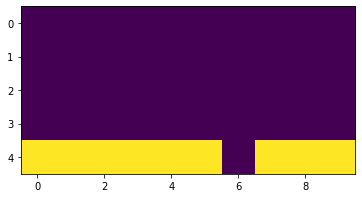

In [22]:
plt.figure()
plt.imshow(result_matrix)

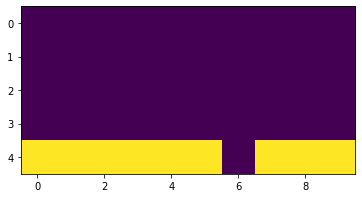

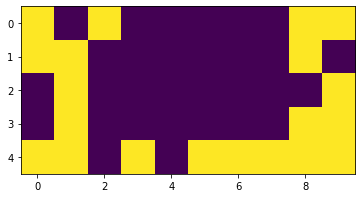

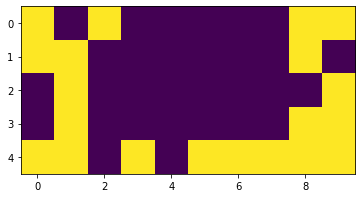

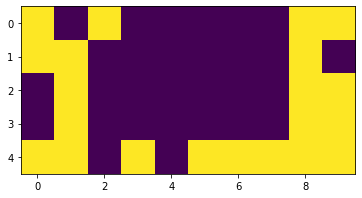

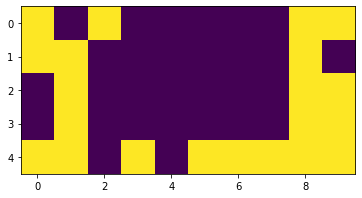

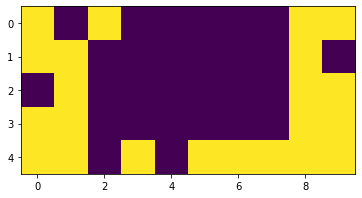

In [23]:
for r in response.record:
    plt.figure()
    plt.imshow(r[0].reshape(N, M).T)